# Airline Loyalty Program - Northern Lights Air

Dataset: https://mavenanalytics.io/guided-projects/airline-loyalty-program

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1.  Flight Activity

In [2]:
df_activity = pd.read_csv("Customer Flight Activity.csv")
df_activity.head()

,Loyalty Number,Year,Month,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100590,2018,6,12,15276,22914.0,0,0
1,100590,2018,7,12,9168,13752.0,0,0
2,100590,2018,5,4,6504,9756.0,0,0
3,100590,2018,10,0,0,0.0,512,92
4,100590,2018,2,0,0,0.0,0,0


In [3]:
df_activity.isna().sum()

Loyalty Number                 0
Year                           0
Month                          0
Total Flights                  0
Distance                       0
Points Accumulated             0
Points Redeemed                0
Dollar Cost Points Redeemed    0
dtype: int64

In [4]:
df_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392936 entries, 0 to 392935
Data columns (total 8 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               392936 non-null  int64  
 1   Year                         392936 non-null  int64  
 2   Month                        392936 non-null  int64  
 3   Total Flights                392936 non-null  int64  
 4   Distance                     392936 non-null  int64  
 5   Points Accumulated           392936 non-null  float64
 6   Points Redeemed              392936 non-null  int64  
 7   Dollar Cost Points Redeemed  392936 non-null  int64  
dtypes: float64(1), int64(7)
memory usage: 24.0 MB


In [5]:
df_activity.duplicated().sum()

1922

In [6]:
df_activity.loc[df_activity.duplicated() == True]

,Loyalty Number,Year,Month,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
176809,357901,2018,2,0,0,0.0,0,0
176811,357901,2018,3,0,0,0.0,0,0
176813,357901,2018,4,0,0,0.0,0,0
176819,357901,2018,9,0,0,0.0,0,0
176822,357901,2018,11,0,0,0.0,0,0
...,...,...,...,...,...,...,...,...
389816,732304,2018,3,0,0,0.0,0,0
389818,732304,2018,4,0,0,0.0,0,0
392342,951353,2018,2,0,0,0.0,0,0
392344,951353,2018,3,0,0,0.0,0,0


Note: Duplicates not dropped since they are clearly different

In [7]:
df_activity.describe()

,Loyalty Number,Year,Month,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
count,392936.000000,392936.000000,392936.000000,392936.000000,392936.000000,392936.000000,392936.000000,392936.000000
mean,550527.519034,2017.513661,6.513661,1.294888,1941.440201,2027.172345,31.304263,5.635661
std,258604.580187,0.499814,3.445428,1.962675,3239.975889,3872.139841,126.653775,22.801167
min,100018.000000,2017.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,327688.000000,2017.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,551833.000000,2018.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,772194.000000,2018.000000,10.000000,2.000000,3018.000000,3039.000000,0.000000,0.000000
max,999986.000000,2018.000000,12.000000,28.000000,67284.000000,100926.000000,876.000000,158.000000


In [8]:
#Data Investigation
df_activity.loc[df_activity['Points Accumulated'] == 100926] #The data seems accurate

,Loyalty Number,Year,Month,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
390593,797704,2018,7,28,67284,100926.0,0,0


In [9]:
df_activity.loc[df_activity['Dollar Cost Points Redeemed'] >=150]

,Loyalty Number,Year,Month,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
429,135134,2018,7,20,11220,16830.0,860,155
1398,384269,2018,7,7,9772,9772.0,857,154
1411,589466,2018,7,7,10710,10710.0,871,157
1657,857353,2018,7,7,14287,14287.0,847,152
1663,547802,2017,7,7,4452,4452.0,863,155
...,...,...,...,...,...,...,...,...
384728,794136,2017,6,0,0,0.0,846,152
387109,486860,2018,7,8,4488,6732.0,832,150
387417,501877,2018,7,8,11408,17112.0,854,154
389637,716197,2018,7,12,12840,19260.0,866,156


<hr>

### 2. Loyalty History

In [10]:
df_loyalty = pd.read_csv("Customer Loyalty History.csv")
df_loyalty.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,0.0,0.0
1,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,0.0,0.0
2,193662,Canada,Yukon,Whitehorse,Y2K 6R0,Male,Bachelor,51124.0,Married,Star,3844.57,Standard,2012,5,0.0,0.0
3,188893,Canada,Ontario,Trenton,K8V 4B2,Male,Bachelor,100159.0,Married,Star,3861.49,Standard,2016,12,0.0,0.0
4,852392,Canada,Quebec,Montreal,H2Y 2W2,Female,Bachelor,100159.0,Married,Star,3861.49,Standard,2015,5,0.0,0.0


In [11]:
df_loyalty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12479 entries, 0 to 12478
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      12479 non-null  int64  
 1   Country             12479 non-null  object 
 2   Province            12479 non-null  object 
 3   City                12479 non-null  object 
 4   Postal Code         12479 non-null  object 
 5   Gender              12479 non-null  object 
 6   Education           12479 non-null  object 
 7   Salary              12479 non-null  float64
 8   Marital Status      12479 non-null  object 
 9   Loyalty Card        12479 non-null  object 
 10  CLV                 12479 non-null  float64
 11  Enrollment Type     12479 non-null  object 
 12  Enrollment Year     12479 non-null  int64  
 13  Enrollment Month    12479 non-null  int64  
 14  Cancellation Year   12479 non-null  float64
 15  Cancellation Month  12479 non-null  float64
dtypes: f

In [12]:
df_loyalty.isna().sum()

Loyalty Number        0
Country               0
Province              0
City                  0
Postal Code           0
Gender                0
Education             0
Salary                0
Marital Status        0
Loyalty Card          0
CLV                   0
Enrollment Type       0
Enrollment Year       0
Enrollment Month      0
Cancellation Year     0
Cancellation Month    0
dtype: int64

In [13]:
df_loyalty['Salary'] = df_loyalty['Salary'].fillna(0)

In [14]:
df_loyalty['Cancellation Year'] = df_loyalty['Cancellation Year'].fillna(0)
df_loyalty['Cancellation Month'] = df_loyalty['Cancellation Month'].fillna(0)

In [15]:
df_loyalty.isna().sum()

Loyalty Number        0
Country               0
Province              0
City                  0
Postal Code           0
Gender                0
Education             0
Salary                0
Marital Status        0
Loyalty Card          0
CLV                   0
Enrollment Type       0
Enrollment Year       0
Enrollment Month      0
Cancellation Year     0
Cancellation Month    0
dtype: int64

In [16]:
df_loyalty.describe()

,Loyalty Number,Salary,CLV,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
count,12479.000000,12479.000000,12479.000000,12479.000000,12479.000000,12479.000000,12479.000000
mean,550074.727302,79429.572642,8119.719981,2015.243289,6.674493,248.524962,0.860646
std,260173.633537,34727.560404,6945.789239,1.983450,3.385190,662.884517,2.603040
min,100018.000000,15609.000000,2119.890000,2012.000000,1.000000,0.000000,0.000000
25%,325544.500000,59265.000000,4082.170000,2014.000000,4.000000,0.000000,0.000000
50%,551429.000000,73510.000000,5808.930000,2015.000000,7.000000,0.000000,0.000000
75%,773900.000000,88600.500000,9071.715000,2017.000000,10.000000,0.000000,0.000000
max,999986.000000,407228.000000,83325.380000,2018.000000,12.000000,2018.000000,12.000000


In [17]:
df_loyalty.loc[df_loyalty['Salary'] <= 0]

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month


In [18]:
#Setting the Salary less than 0 to be 0.
df_loyalty.loc[df_loyalty['Salary'] <=0] = 0 

In [19]:
df_loyalty.loc[df_loyalty['Salary'] < 0]

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month


In [20]:
df_loyalty.loc[df_loyalty['CLV'] == 83325.38]

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
12132,615459,Canada,Quebec,Montreal,H2Y 4R4,Male,Bachelor,75049.0,Married,Star,83325.38,2018 Promotion,2018,4,2018.0,12.0
12478,652627,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049.0,Married,Star,83325.38,Standard,2015,12,2016.0,8.0


In [21]:
df_loyalty.duplicated().sum()

0

In [22]:
df_loyalty.loc[df_loyalty.duplicated() == True]

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month


In [23]:
#Dropping duplicates since they contain only 0 values
df_loyalty.drop_duplicates(inplace=True)

In [24]:
df_loyalty = df_loyalty.loc[df_loyalty['Loyalty Number']!=0]

### Analysis:
1. Flight Activity

In [25]:
df_activity.head()

,Loyalty Number,Year,Month,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100590,2018,6,12,15276,22914.0,0,0
1,100590,2018,7,12,9168,13752.0,0,0
2,100590,2018,5,4,6504,9756.0,0,0
3,100590,2018,10,0,0,0.0,512,92
4,100590,2018,2,0,0,0.0,0,0


In [26]:
df_activity['Date'] = pd.to_datetime(df_activity[['Year', 'Month']].assign(DAY=1))
df_activity.head()

,Loyalty Number,Year,Month,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Date
0,100590,2018,6,12,15276,22914.0,0,0,2018-06-01
1,100590,2018,7,12,9168,13752.0,0,0,2018-07-01
2,100590,2018,5,4,6504,9756.0,0,0,2018-05-01
3,100590,2018,10,0,0,0.0,512,92,2018-10-01
4,100590,2018,2,0,0,0.0,0,0,2018-02-01


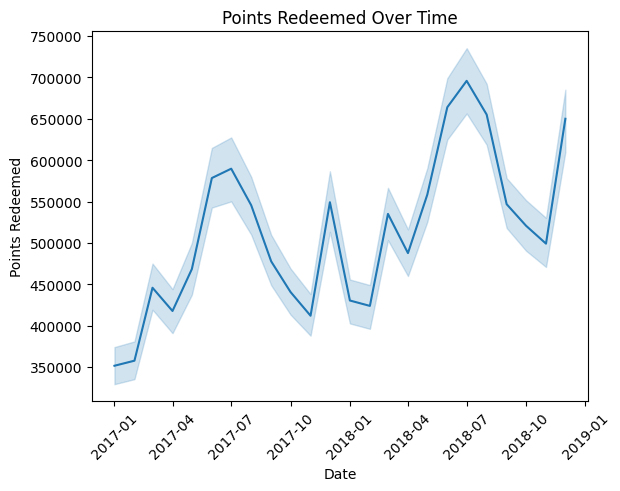

In [27]:
sns.lineplot(x = "Date", y = "Points Redeemed", data = df_activity, estimator="sum")
plt.title("Points Redeemed Over Time")
plt.xlabel("Date")
plt.ylabel("Points Redeemed")
plt.xticks(rotation=45)
plt.show()

In [28]:
df_activity.columns

Index(['Loyalty Number', 'Year', 'Month', 'Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed',
       'Date'],
      dtype='object')

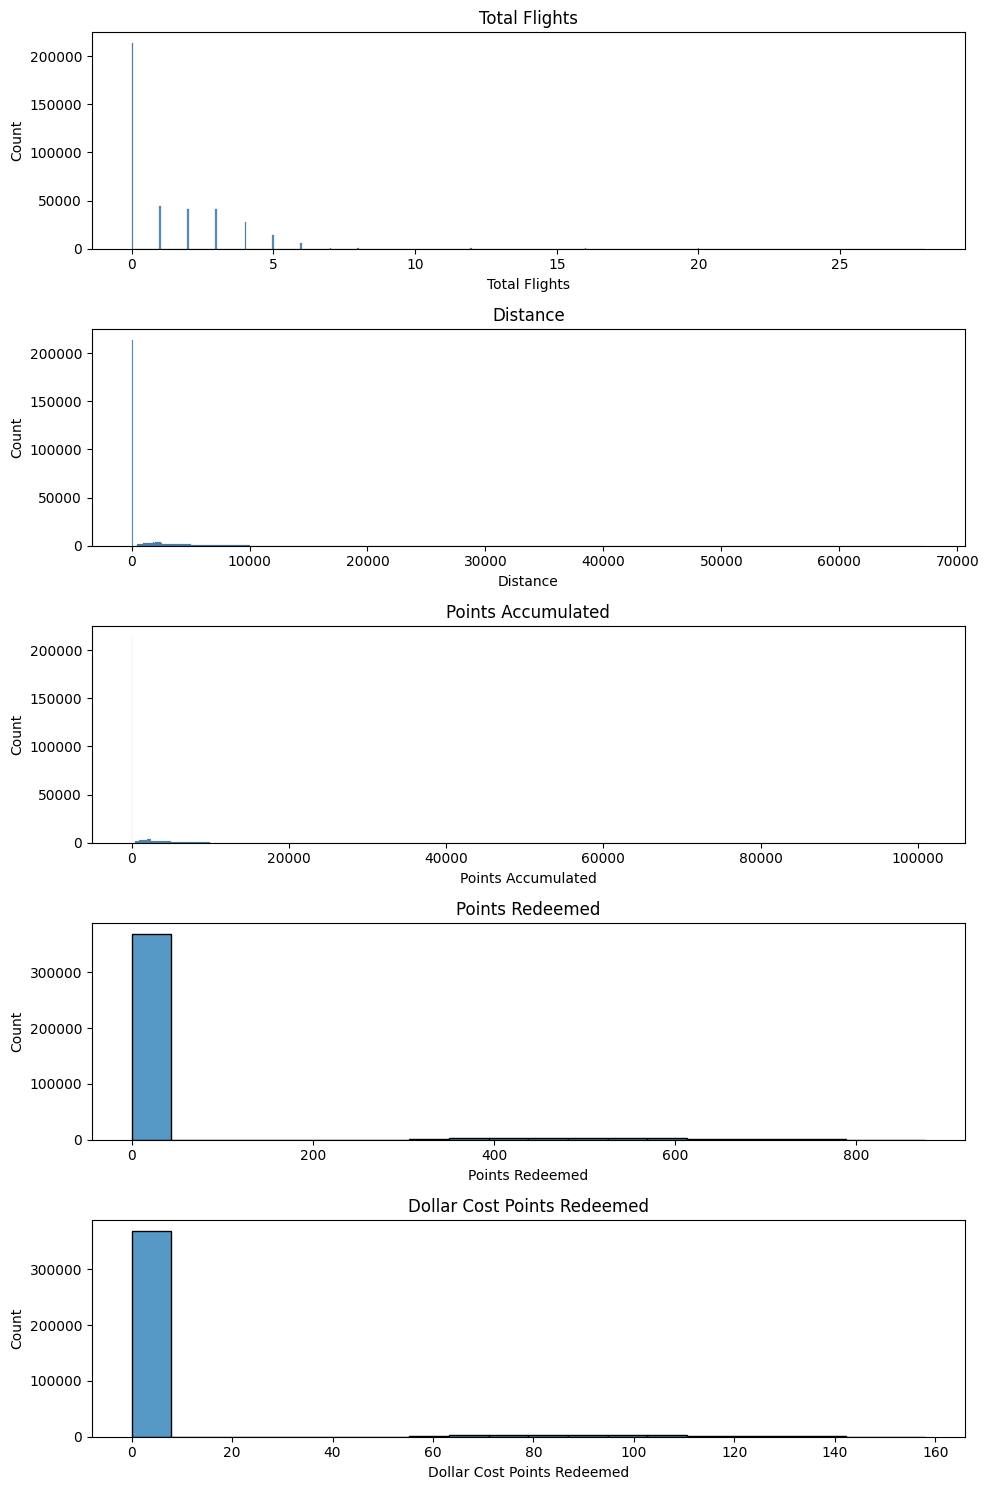

In [29]:
#Plotting distributions
fig, axes = plt.subplots(5, 1, figsize=(10, 15))
for col, ax in zip(['Total Flights', 'Distance', 'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed'], axes):
    sns.histplot(x=col, data=df_activity, ax=ax)
    ax.set_title(col)
    ax.set_xlabel(col)

plt.tight_layout()
plt.show()

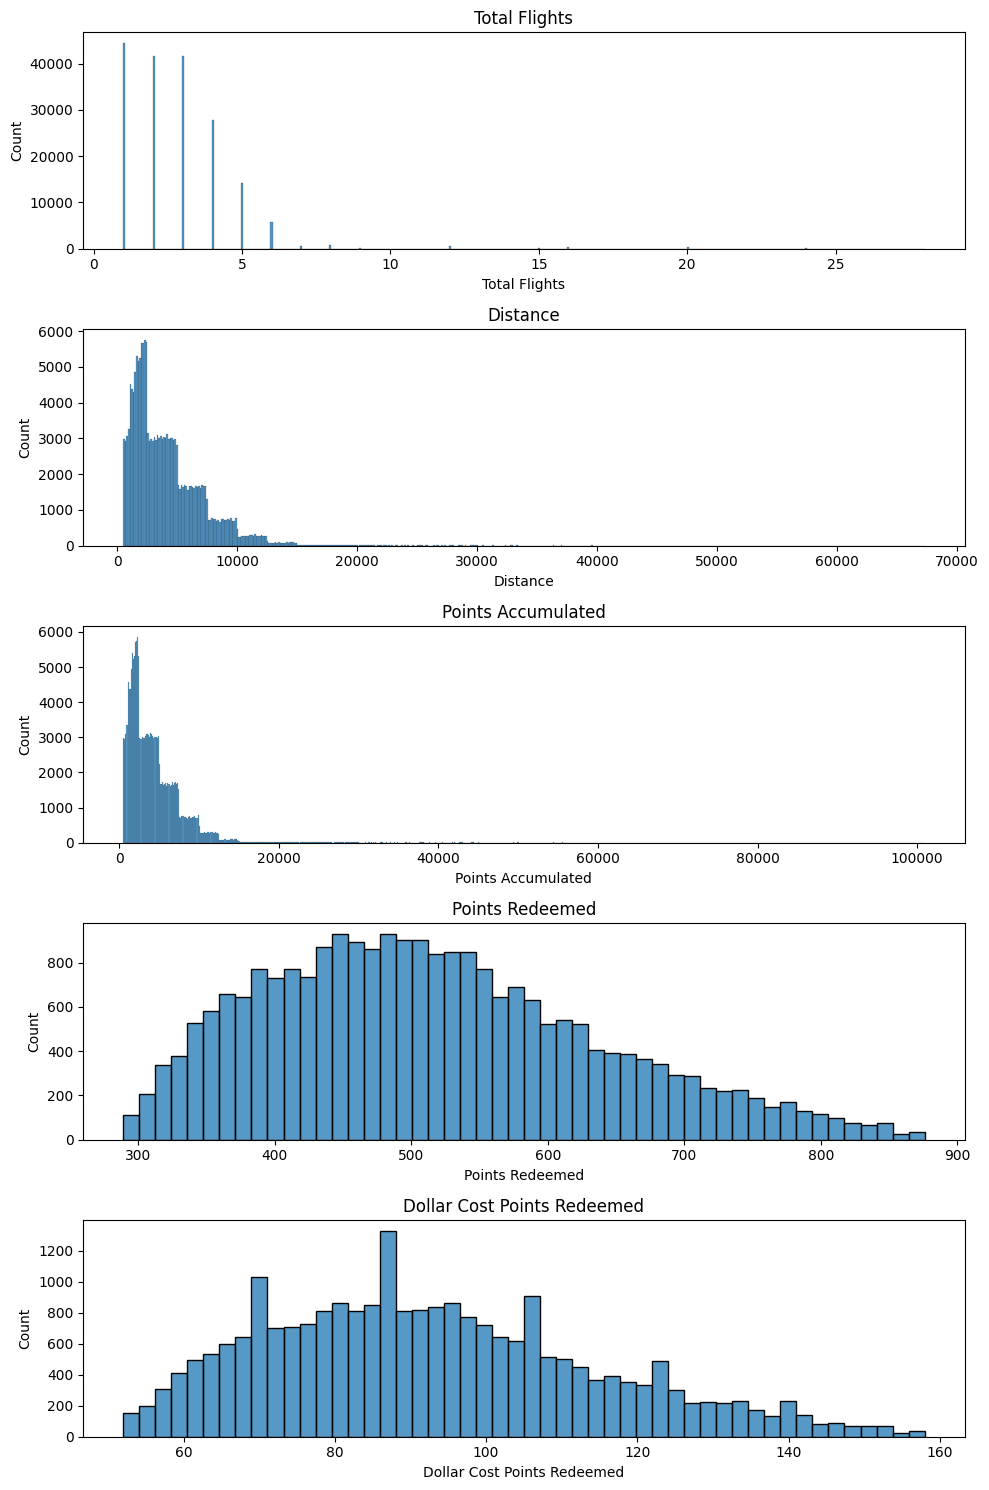

In [30]:
#Plotting distributions for values greater than 0
fig, axes = plt.subplots(5, 1, figsize=(10, 15))
for col, ax in zip(['Total Flights', 'Distance', 'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed'], axes):
    sns.histplot(x=col, data=df_activity.loc[df_activity[col]>0], ax=ax)
    ax.set_title(col)

plt.tight_layout()
plt.show()

In [31]:
df_activity.columns

Index(['Loyalty Number', 'Year', 'Month', 'Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed',
       'Date'],
      dtype='object')

In [32]:
#Grouping the data based on loyalty numbers
df_activity_agg = df_activity[['Loyalty Number','Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed']].groupby('Loyalty Number').sum().reset_index()

In [33]:
df_activity_agg

,Loyalty Number,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,46,81190,81190.0,1513,272
1,100102,51,68918,68918.0,1195,215
2,100140,47,72856,72856.0,593,107
3,100214,22,38236,38236.0,861,155
4,100272,37,54997,54997.0,1007,182
...,...,...,...,...,...,...
16732,999902,50,83725,83725.0,876,158
16733,999911,0,0,0.0,0,0
16734,999940,18,28275,28275.0,672,121
16735,999982,6,8323,8323.0,0,0


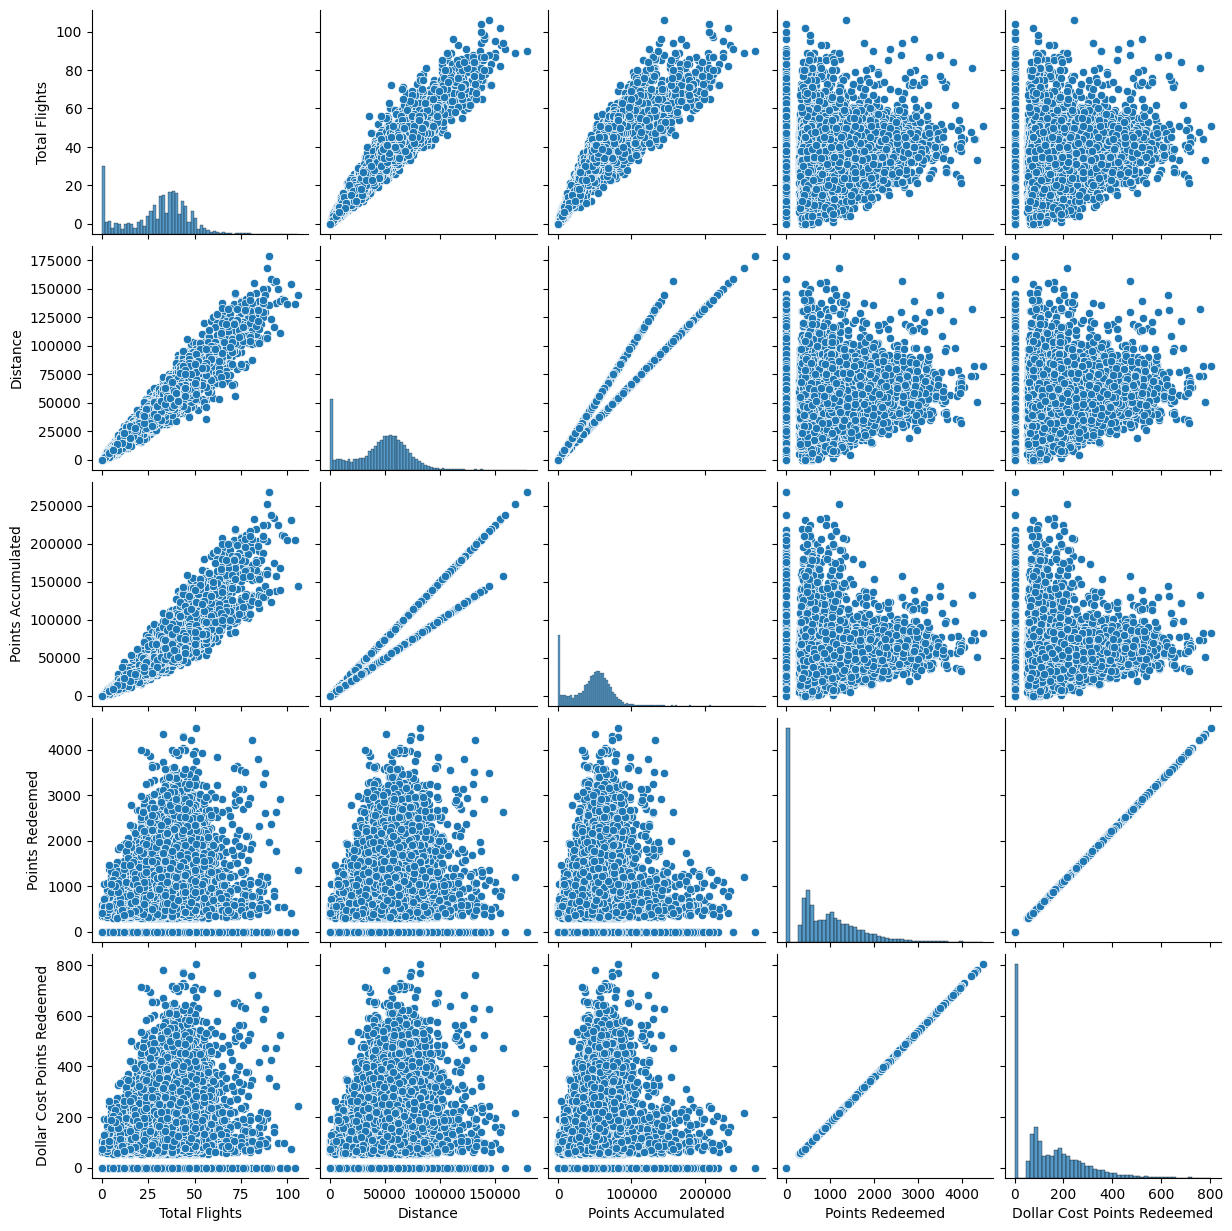

In [34]:
sns.pairplot(df_activity_agg.iloc[:, 1:])
plt.show()

### 2. Loyalty

In [35]:
df_loyalty.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,0.0,0.0
1,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,0.0,0.0
2,193662,Canada,Yukon,Whitehorse,Y2K 6R0,Male,Bachelor,51124.0,Married,Star,3844.57,Standard,2012,5,0.0,0.0
3,188893,Canada,Ontario,Trenton,K8V 4B2,Male,Bachelor,100159.0,Married,Star,3861.49,Standard,2016,12,0.0,0.0
4,852392,Canada,Quebec,Montreal,H2Y 2W2,Female,Bachelor,100159.0,Married,Star,3861.49,Standard,2015,5,0.0,0.0


In [36]:
df_loyalty['Loyalty Number'].value_counts().sort_values(ascending=False)

Loyalty Number
588237    1
652627    1
480934    1
530508    1
193662    1
         ..
583670    1
588917    1
635334    1
987205    1
398924    1
Name: count, Length: 12479, dtype: int64

In [37]:
df_loyalty['Country'].value_counts()

Country
Canada    12479
Name: count, dtype: int64

In [38]:
df_loyalty.columns

Index(['Loyalty Number', 'Country', 'Province', 'City', 'Postal Code',
       'Gender', 'Education', 'Salary', 'Marital Status', 'Loyalty Card',
       'CLV', 'Enrollment Type', 'Enrollment Year', 'Enrollment Month',
       'Cancellation Year', 'Cancellation Month'],
      dtype='object')

/tmp/ipykernel_44/975653225.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=25)
/tmp/ipykernel_44/975653225.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


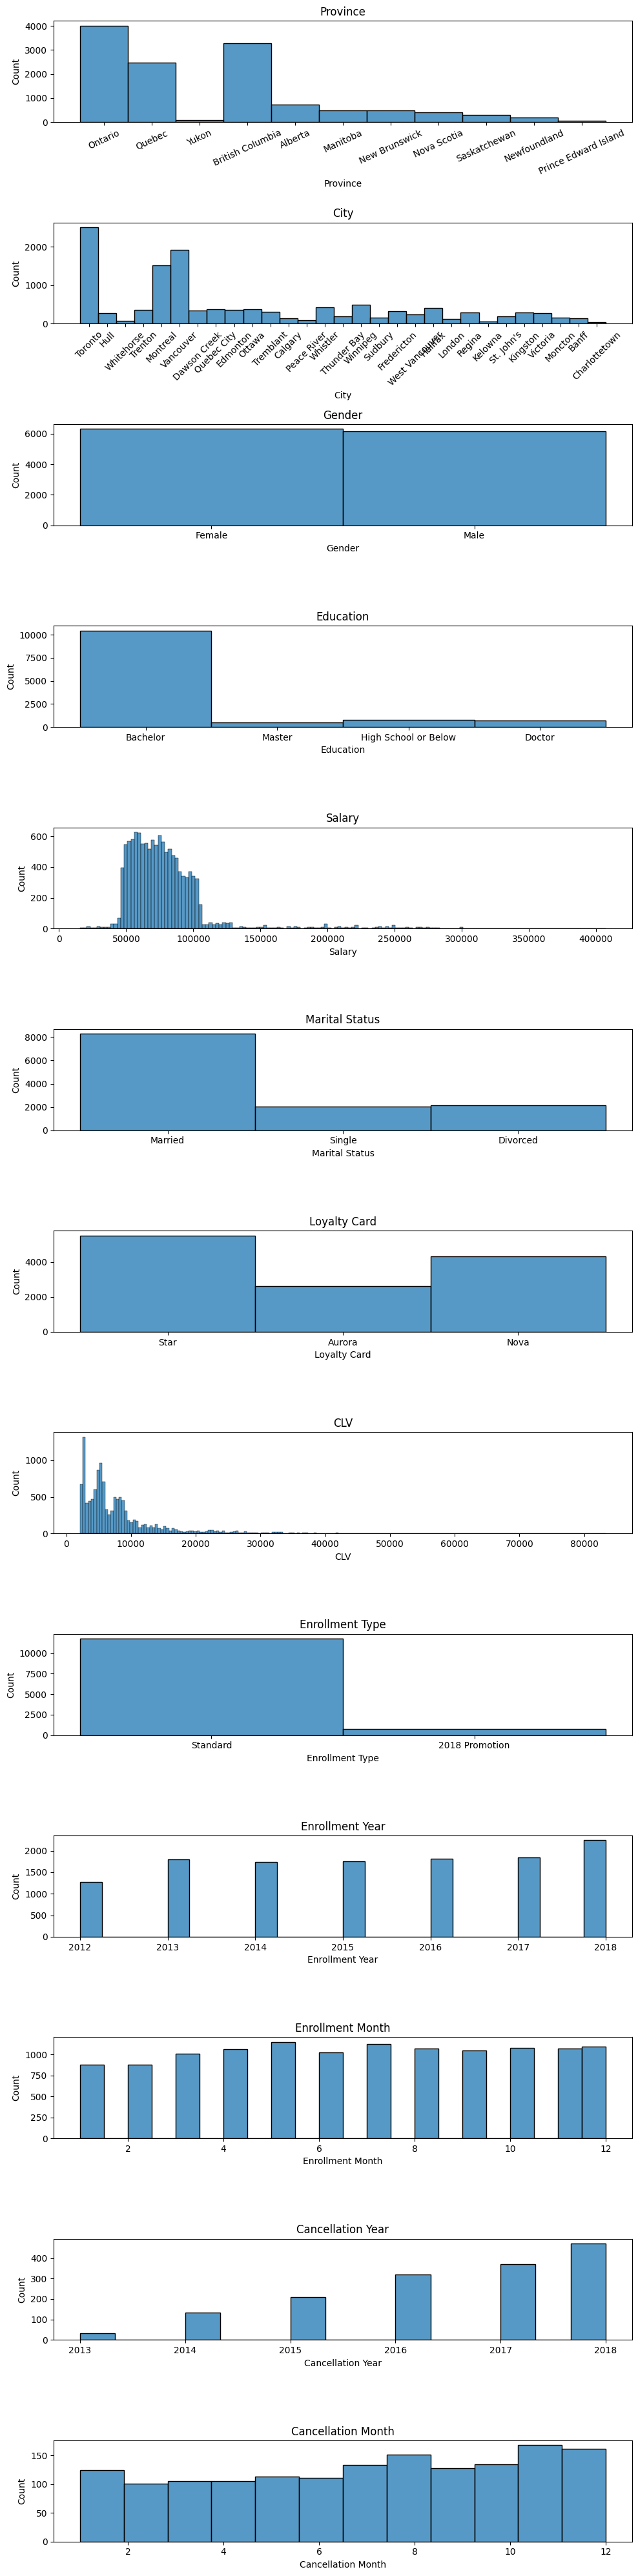

In [39]:
cols = ['Province', 'City', 'Gender', 'Education', 'Salary', 'Marital Status', 'Loyalty Card',
       'CLV', 'Enrollment Type', 'Enrollment Year', 'Enrollment Month',
       'Cancellation Year', 'Cancellation Month']
fig, axes = plt.subplots(13,1, figsize=(10, 40))
for col, ax in zip(cols, axes):
    if col in ['Cancellation Year', 'Cancellation Month']:
        sns.histplot(x = col, data = df_loyalty.loc[df_loyalty[col] > 0], ax = ax)
    else:
        sns.histplot(x = col, data = df_loyalty, ax = ax)

    ax.set_title(col)
    
    if col == 'Province':
        ax.set_xticklabels(ax.get_xticklabels(), rotation=25)
    if col == 'City':
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45)



plt.tight_layout()
plt.show()

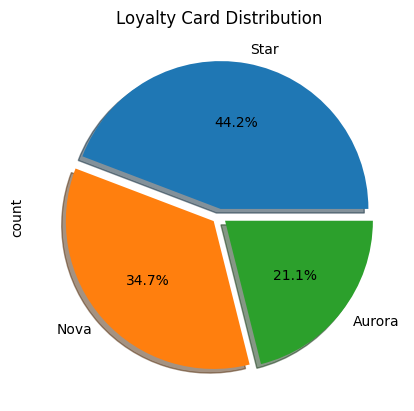

In [40]:
#Pie chart for Loyalty Card
df_loyalty['Loyalty Card'].value_counts().plot(kind='pie', autopct='%1.1f%%', explode = [0.05, 0.05, 0.05], shadow=True)
plt.title("Loyalty Card Distribution")
plt.show()

In [41]:
df_loyalty['Enrollment Date'] = pd.to_datetime(
    df_loyalty[['Enrollment Year', 'Enrollment Month']]
    .rename(columns={'Enrollment Year': 'year', 'Enrollment Month': 'month'})
    .assign(day=1)
)

In [42]:
#Setting appropriate datetime data type for the cancellation dates
mask = df_loyalty['Cancellation Year'] != 0
cancel_dates = df_loyalty.loc[mask, ['Cancellation Year', 'Cancellation Month']].rename(
    columns={'Cancellation Year': 'year', 'Cancellation Month': 'month'}
).assign(day=1)
cancel_dates_dt = pd.to_datetime(cancel_dates)

# Assign only to nonzero rows
df_loyalty.loc[mask, 'Cancellation Date'] = cancel_dates_dt

In [43]:
df_loyalty

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Enrollment Date,Cancellation Date
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,0.0,0.0,2016-02-01,NaT
1,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,0.0,0.0,2014-10-01,NaT
2,193662,Canada,Yukon,Whitehorse,Y2K 6R0,Male,Bachelor,51124.0,Married,Star,3844.57,Standard,2012,5,0.0,0.0,2012-05-01,NaT
3,188893,Canada,Ontario,Trenton,K8V 4B2,Male,Bachelor,100159.0,Married,Star,3861.49,Standard,2016,12,0.0,0.0,2016-12-01,NaT
4,852392,Canada,Quebec,Montreal,H2Y 2W2,Female,Bachelor,100159.0,Married,Star,3861.49,Standard,2015,5,0.0,0.0,2015-05-01,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12474,302628,Canada,Quebec,Tremblant,H5Y 2S9,Male,Bachelor,61718.0,Single,Star,55277.45,Standard,2013,3,0.0,0.0,2013-03-01,NaT
12475,302460,Canada,British Columbia,Whistler,V6T 1Y8,Female,Bachelor,88425.0,Married,Star,56675.94,Standard,2014,9,0.0,0.0,2014-09-01,NaT
12476,672917,Canada,Ontario,Toronto,M1R 4K3,Female,Bachelor,76778.0,Single,Star,58166.55,Standard,2015,1,2015.0,9.0,2015-01-01,2015-09-01
12477,680886,Canada,Saskatchewan,Regina,S1J 3C5,Female,Bachelor,89210.0,Married,Star,67907.27,Standard,2014,9,0.0,0.0,2014-09-01,NaT


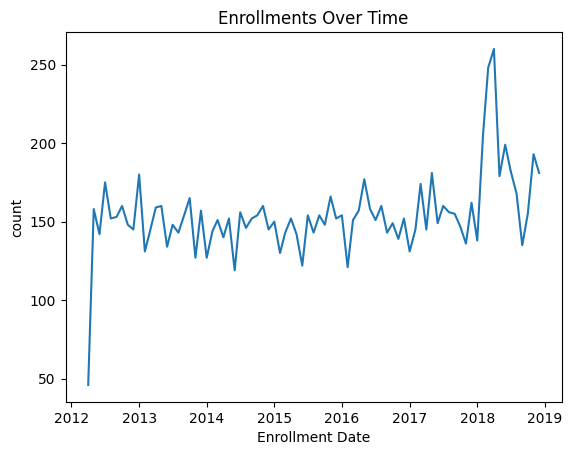

In [44]:
sns.lineplot(data = df_loyalty['Enrollment Date'].value_counts().sort_values(ascending=False))
plt.title("Enrollments Over Time")
plt.show()

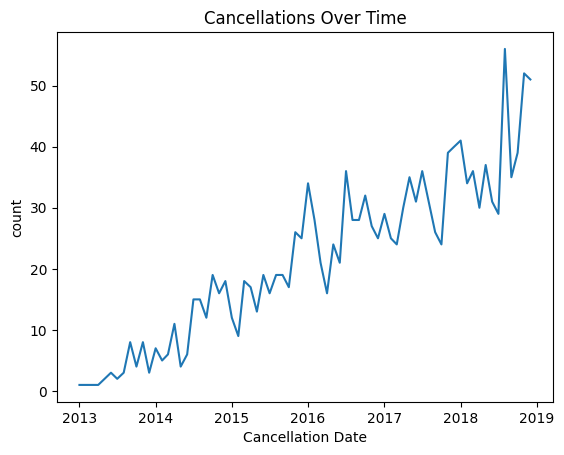

In [45]:
sns.lineplot(data = df_loyalty['Cancellation Date'].value_counts().sort_values(ascending=False))
plt.title("Cancellations Over Time")
plt.show()

In [46]:
df_loyalty

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Enrollment Date,Cancellation Date
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,0.0,0.0,2016-02-01,NaT
1,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,0.0,0.0,2014-10-01,NaT
2,193662,Canada,Yukon,Whitehorse,Y2K 6R0,Male,Bachelor,51124.0,Married,Star,3844.57,Standard,2012,5,0.0,0.0,2012-05-01,NaT
3,188893,Canada,Ontario,Trenton,K8V 4B2,Male,Bachelor,100159.0,Married,Star,3861.49,Standard,2016,12,0.0,0.0,2016-12-01,NaT
4,852392,Canada,Quebec,Montreal,H2Y 2W2,Female,Bachelor,100159.0,Married,Star,3861.49,Standard,2015,5,0.0,0.0,2015-05-01,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12474,302628,Canada,Quebec,Tremblant,H5Y 2S9,Male,Bachelor,61718.0,Single,Star,55277.45,Standard,2013,3,0.0,0.0,2013-03-01,NaT
12475,302460,Canada,British Columbia,Whistler,V6T 1Y8,Female,Bachelor,88425.0,Married,Star,56675.94,Standard,2014,9,0.0,0.0,2014-09-01,NaT
12476,672917,Canada,Ontario,Toronto,M1R 4K3,Female,Bachelor,76778.0,Single,Star,58166.55,Standard,2015,1,2015.0,9.0,2015-01-01,2015-09-01
12477,680886,Canada,Saskatchewan,Regina,S1J 3C5,Female,Bachelor,89210.0,Married,Star,67907.27,Standard,2014,9,0.0,0.0,2014-09-01,NaT


In [47]:
#Number of enrollments within the promotion period
df_loyalty.loc[(df_loyalty['Enrollment Date'] >= '2018-02-01') & (df_loyalty['Enrollment Date'] <= '2018-04-30'),'Loyalty Number'].count()

713

In [48]:
#Distribution of people who join with the promotion code in promotion period
df_loyalty.loc[(df_loyalty['Enrollment Date'] >= '2018-02-01') & (df_loyalty['Enrollment Date'] <= '2018-04-30') & (df_loyalty['Enrollment Type'] == "2018 Promotion"),'Loyalty Number'].count()

713

In [50]:
#Save the loyalty and activity data in csv files for Power BI
df_loyalty.to_csv("Loyalty.csv", index=False)
df_activity.to_csv("Activity.csv", index=False)

In [51]:
df_activity_agg.to_csv("Aggregated Activity.csv", index = False)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=bc8f4021-1e31-4083-96cf-7f62db2bc526' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>